In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [21]:
def multivargauss(mu, sig):
    n_dim = mu.shape[0]
    x = np.random.rand(n_dim)
    u = x-mu
    sig_inv = np.linalg.inv(sig)
    
    print(np.dot(u.T, sig_inv, u))

In [22]:
multivargauss(np.array([1,2]), np.random.rand(2,2))

[-1.40774316 -2.09111397]


In [60]:
def MultiVarGaussGen(n_dim, n_samples, mu=0, sigma=1):
    l = []
    for i in range(n_samples):
        l.append(np.random.rand(1,n_dim))
    l = np.array(l)
    print(l)
    l = l.reshape(-1,2)
    print(l)
    return l

/home/udion/Misc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """
/home/udion/Misc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  


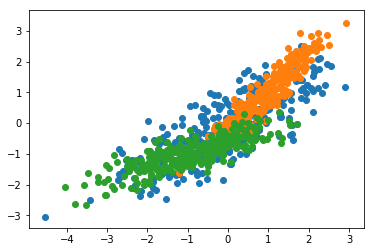

In [126]:
mu1 = 1*np.ones(2)
mu2 = -1*np.ones(2)
sig1 = np.random.rand(2,2)
sig2 = np.random.rand(2,2)
v1 = np.random.multivariate_normal(mu1, sig1, 300)
v2 = np.random.multivariate_normal(mu2, sig2, 300)
v = v1+v2
plt.scatter(v[:,0], v[:,1])
plt.scatter(v1[:,0], v1[:,1])
plt.scatter(v2[:,0], v2[:,1])
plt.show()

In [157]:
np.random.choice(np.arange(1, 7), p=[0.1, 0.05, 0.05, 0.2, 0.4, 0.2])

6

In [187]:
np.random.rand(3,3)

array([[ 0.62043055,  0.50453371,  0.42510704],
       [ 0.50470004,  0.74966019,  0.07815708],
       [ 0.86150903,  0.46715713,  0.53831687]])

In [177]:
class GMMsampler:
    
    def __init__( self, n_samples, n_components=1, weights=[1], mu=[np.array([0,0])], sig=[np.array([[1,0],[0,1]])]):
        self.n_components = n_components
        self.n_samples = n_samples
        self.weights = weights
        self.mu = mu
        self.sig = sig
        self.dim = mu[0].size
        self.data = np.empty([n_samples, self.dim])
        
    def check_musig(self):
        shmu = self.mu[0].shape
        shsig = self.sig[0].shape
        if(not(all(m.shape==shmu for m in mu))):
            print('all mean vectors must be of same dimension')
        if(not(all(s.shape==shmu for s in sig))):
            print('all covariance matrix must be of same dimension')
    
    def gen_sample(self):
        for i in range(self.n_samples):
            idx = np.random.choice(np.arange(0,self.n_components), p=(self.weights)/np.sum(self.weights))
            mu_,sig_ = self.mu[idx], self.sig[idx]
            self.data[i,:] = np.random.multivariate_normal(mu_, sig_)

In [188]:
m1 = np.array([1,0])
m2 = np.array([0,3])
sig1 = np.random.rand(2,2)
sig2 = np.random.rand(2,2)
g = GMMsampler(200,2,weights=[0.6, 0.4], mu=[m1, m2], sig=[sig1, sig2])

In [193]:
g.gen_sample()

/home/udion/Misc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: covariance is not positive-semidefinite.


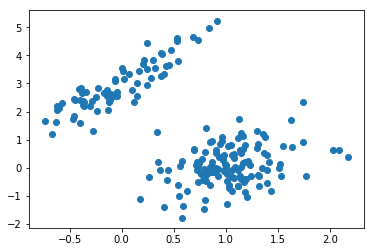

In [194]:
plt.scatter(g.data[:,0],g.data[:,1])
plt.show()